# 1.1 탐색적 데이터 분석의 과정
- 탐색적 데이터 분석 : 데이터의 정보를 파악하며 문제 해결에 필요한 힌트를 분석하는 과정

<데이터의 외형 파악 순서>
1. 데이터의 출처, 주제에 대해 이해  
2. 데이터의 크기 알아보기
    -> 데이터의 크기에 따라 특별한 종류의 sampling 필요하기도 하고 어떤 방식으로 데이터를 처리할지도 달라짐  
3. __데이터의 구성 요소(feature)를 살펴보기__(중요한 과정)  -> feature = 데이터를 구성하는 요소

<데이터의 속성 파악>
1. feature의 속성 탐색 __(데이터에 질문 던지기)__
    -> 평균, 표준편차, 중앙값, 데이터의 사분위 수 등의 통계값 구하기 = feature의 측정 가능한 정량적 속성 정의  
2. feature 간의 상관 관계 탐색 
    -> 여러 개의 feature가 서로에게 미치는 영향력 알아보기(공분산, 상관 계수 같은 개념 포함)
    
<탐색한 데이터의 시각화>
- 데이터 시각화는 수치적 자료만 가지고는 파악하기 힘든 __패턴이나 인사이트__를 발견하는 데 유용하다.

# 1.2 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기
: 멕시코풍 프랜차이즈 'chipotle'라는 음식점의 주문 데이터

<생각해볼 수 있는 질문 list>
- 가장 인기 있는 메뉴는 무엇일까?
- 가장 많이 판매된 메뉴 Top 10은 무엇일까?
- 메뉴별 판매량은 얼마나 될까?
- 메뉴별 가격대는 얼마일까?


In [1]:
# -*- coding:uft-8 -*-

import pandas as pd

file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

### 1) 데이터의 외형 파악

In [2]:
# 데이터셋의 기초 정보 출력
print(chipo.shape)
print('---------------------')
print(chipo.info()) # 행, 열의 구성 정보를 보여줌

(4622, 5)
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


- 4622개의 행, 5개의 feature로 구성
- order_id, quantity : int64(숫자) / 나머지 : 문자열
- __choice_description -> 3376개의 문자열로 구성(결측값 존재)__

In [3]:
# 데이터 확인
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


- order_id : 주문 번호
- quantity : 아이템의 주문 수량
- item_name : 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격 정보

In [4]:
print(chipo.columns) # 열
print(chipo.index) # 행

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


### 2) 데이터의 속성 파악

_연속형 features(quantity, item_price) 기초통계량 확인_

In [5]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


- order_id는 숫자의 의미를 갖지 않기 때문에 str로 변환한다.
- item_price는 문자열 타입이기 때문에 describe()로 기초통계량 확인 불가 -> 추가적인 데이터 전처리 작업 필요 (뒤에서 할 것)

In [6]:
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


- 아이템의 평균 주문 수량 = 약 1.07  
=> 대부분이 한 아이템에 대해 1개 정도만 주문했다.  
=> __한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다.__  (인사이트 get)

_범주형 feature의 중복 제외 개수 확인_

In [7]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


### 3-1) 탐색

_가장 많이 주문한 아이템 Top 10_

In [8]:
item_count = chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [9]:
for i, j in enumerate(item_count.iteritems(),1):
    print(j)

('Chicken Bowl', 726)
('Chicken Burrito', 553)
('Chips and Guacamole', 479)
('Steak Burrito', 368)
('Canned Soft Drink', 301)
('Steak Bowl', 211)
('Chips', 211)
('Bottled Water', 162)
('Chicken Soft Tacos', 115)
('Chips and Fresh Tomato Salsa', 110)


In [10]:
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print('Top', idx, ':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


_아이템별 주문 개수와 총량_

In [17]:
# 아이템별 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [19]:
# 아이템별 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 3-2) 시각화

_아이템별 주문 총량_

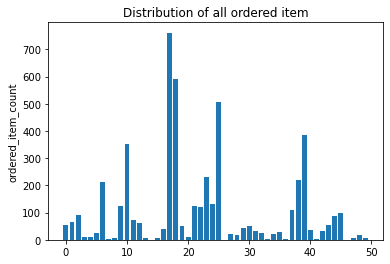

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list)) # x축
order_cnt = item_quantity.values.tolist() # y축

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

### 4. 데이터 전처리 : 전처리 함수 사용하기

In [29]:
# 문자열 타입이었던 feature 수치형으로 전처리
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [30]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [34]:
# $ 기호 제거하기
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:])) # apply()는 series 단위의 연산 처리
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [35]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### 5. 탐색적 분석 : 스무고개로 개념적 탐색 분석하기

_주문당 평균 계산금액 출력하기_

In [43]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

-> 한 사람이 '약 18달러 가량의 주문을 할 것'

_한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기_

In [51]:
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group.head()

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08


In [56]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results.index.values)
results.head()

['1' '10' '100' ... '997' '998' '999']


,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08


_각 아이템의 가격 구하기_

In [60]:
chipo_one_item = chipo[chipo.quantity == 1] # 동일 아이템 1개만 구매한 주문 선별
chipo_one_item[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
10,5,1,Chips and Guacamole,NaN,4.45


In [62]:
price_per_item = chipo_one_item.groupby('item_name').min() # 각 아이템별 최저가
price_per_item[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [65]:
price_per_item.sort_values(by = 'item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [70]:
item_name_list = price_per_item.index.tolist() # 아이템 이름 리스트
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist() # 아이템 이름 당 가격

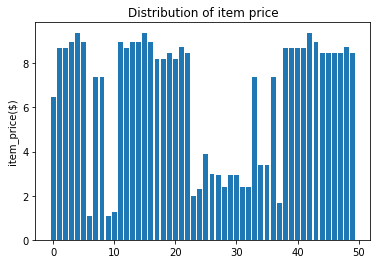

In [72]:
# 아이템 가격 분포 그래프
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item_price($)')
plt.title('Distribution of item price')
plt.show()

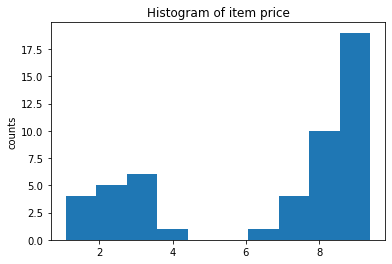

In [74]:
# 아이템 가격 히스토그램
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

-> 2-4 달러, 6-8달러 정도에 아이템의 가격대 형성

_가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기_

In [79]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


-> 23개 팔린 것을 알 수 있다. 

_'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기_

In [81]:
chipo_salad = chipo[chipo['item_name']=='Veggie Salad Bowl']
chipo_salad.head()

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [88]:
# 한 주문 내에서 중복 집계된 경우 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])
print(len(chipo_salad))
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


_'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기_

In [98]:
chipo_chicken = chipo[chipo['item_name']=='Chicken Bowl']
chipo_chicken.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


In [102]:
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_ordersum.head()

order_id
10      1
1000    1
1004    2
1006    1
1008    1
Name: quantity, dtype: int64

In [101]:
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
chipo_chicken_result.head()

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64